In [ ]:
#Importing required packages.

import pandas as pd
import seaborn as sns #lines 2 and 3 are for graphing #Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
import matplotlib.pyplot as plt #Matplotlib is a plotting library for creating static, animated, and interactive visualizations in Python. 
from sklearn.ensemble import RandomForestClassifier #Ensemble method creates multiple models and combines them to solve it.
from sklearn.svm import SVC #Support Vector Classifier, is a supervised machine learning algorithm typically used for classification tasks.
from sklearn import svm #Support vector machines (SVMs) are a particularly powerful and flexible class of supervised algorithms for both classification and regression and outlier detection.
from sklearn.neural_network import MLPClassifier #MLPClassifier stands for Multi-layer Perceptron classifier which in the name itself connects to a Neural Network. 

#from sklearn.linear_model import SGDClassifier (Stochastic gradient descent is an optimization algorithm often used in machine learning applications to find the model parameters that correspond to the best fit between predicted and actual outputs.)
from sklearn.metrics import confusion_matrix, classification_report #to evaluate the performance of a classifier 
from sklearn.preprocessing import StandardScaler, LabelEncoder #standardscaler is for standardization #labelencoder- replace the categorical value with a numeric value between 0 and the number of classes minus 1 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
%matplotlib inline


In [ ]:

#Importing required packages.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier 

#from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
%matplotlib inline

#Loading dataset
wine = pd.read_csv('/content/winequality-red.csv',sep=';') #uploads the dataset to files section and then clicked to find the file path and pasted it here.

print (wine.head()) #shows first five lines present in datasheet as default. for more values, put a number inside the brackets

print (' ') #added this to seperate each section

print(wine.info()) #non-null = no nun values here
 
print (' ')

print (wine.isnull().sum()) #shows how many null values are in each section



  fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0   7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5                                                                                               
1   7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5                                                                                               
2  7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,...                                                                                               
3  11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58...                                                                                               
4   7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5                                                                                               
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 1 columns):
 #  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


              precision    recall  f1-score   support

           0       0.92      0.96      0.94       273
           1       0.67      0.51      0.58        47

    accuracy                           0.89       320
   macro avg       0.79      0.73      0.76       320
weighted avg       0.88      0.89      0.88       320

[[261  12]
 [ 23  24]]
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320

[[268   5]
 [ 35  12]]
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       273
           1       0.69      0.51      0.59        47

    ac

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([0])

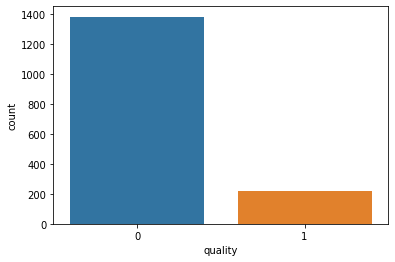

In [ ]:

#Importing required packages.

import pandas as pd
import seaborn as sns #lines 2 and 3 are for graphing
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier 

#from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
%matplotlib inline

#Loading dataset
wine = pd.read_csv('/content/winequality-red.csv') #if i write sep=";" here after ....csv', the program doesn't work for some reason

#Preprocessing data:

bins = (2, 6.5, 8) # in wine.head part, you can see many different values in the quality column (ex: 5,6,7). now we are seperating that into just 2 bins of quality: good and bad. if 2<x<6.5= bad, 6.5<x<8 = good
group_names = ['bad', 'good']
wine['quality']= pd.cut(wine['quality'], bins= bins, labels = group_names)
wine['quality'].unique()

label_quality= LabelEncoder() #this replaces categorical value with a numeric value between 0 and the number of classes minus 1. here, as the number of classes is 2 (good and bad), the label encoder changes the values into 0 or 1 (2-1=1).

wine['quality']= label_quality.fit_transform(wine['quality']) 

wine.head() #now we can see that in quality column, theres only 0 and 1 value. 0 =bad, 1 = good.

wine['quality'].value_counts() #shows how many wines are good (1) and bad(0)

sns.countplot(wine['quality']) #graphical representation of good and bad quality wine

#Now seperate the dataset as response variable and feature variable:
#this is to seperate the features we need to predict the quality of the wine adn the quality itself. so on the basis on other features of the wine- ex: acidity, suger, we are coding to predict the quality of the wine

X= wine.drop('quality', axis=1) #x = all features - quality
y= wine['quality'] #y = quality only

# Train and Test splitting of data:

X_train, X_test, y_train, y_test = train_test_split (X,y, test_size= 0.2, random_state =42) #test size = 0.2 means 20% default size would be 0.25. random state is not too imp, its just a random number.

#Applying Standard Scaling to get optimized result:

sc= StandardScaler() # total sulfur dioxide column has very large values ex: 34, 54, 102 while the chloride column has values like 0.076 so they have very little impact compared to sulfur values. so we need to standardize all values to level the playing field.
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

X_train[:10] #now we can see that our values are much more uniform.

#3 MOST COMMONLY USED CLASSIFIERS- RFC, SVM, NERUAL NETWORK- WE WILL EXPLORE:

#Random Forest Classifier: (best used for medium sized dataset)

rfc= RandomForestClassifier (n_estimators=200) #200 = number of trees in the forest aka number of models in here. usually start with a higher number, then lower it to see if it keeps the same value. smaller the number, better the fit.
rfc.fit(X_train, y_train) #fitting our training data into it
pred_rfc=rfc.predict(X_test) #predicting

#Let's see how well our model performed
 
print (classification_report(y_test,pred_rfc)) #report shows how good are our actual values against our predicted values.

print (confusion_matrix(y_test, pred_rfc)) #shows that we had 264 correct and 9 wrong for bad wine and alot of mislables for good wine. shows that we are good are predicting bad wine but not so good at predicting the good wine.

print ('----------------------------------------------------------------')

#SVM CLASSIFIER: (works better on smaller numbers)
clf=svm.SVC()
clf.fit(X_train, y_train)
pred_clf= clf.predict (X_test)

print (classification_report(y_test,pred_clf))
print (confusion_matrix(y_test, pred_clf))

#we can see precision of rfc is better than svm. 

print ('----------------------------------------------------------------')

#NEURAL NETWORKS: (can work with large amounts of data, good with image processing)

mlpc= MLPClassifier(hidden_layer_sizes=(11,11,11), max_iter=500) # 3 layers of 11 size each. default iteration= 200. 500 iteration means that it is goinf through the data 500 times to program those diff layers and carefully adjust them.
mlpc.fit(X_train, y_train)
pred_mlpc=mlpc.predict(X_test)

print (classification_report(y_test,pred_mlpc))
print (confusion_matrix(y_test, pred_mlpc))

#didn't do as good with labeling the bad wines.

print ('----------------------------------------------------------------')

from sklearn.metrics import accuracy_score
cm= accuracy_score(y_test, pred_rfc)
print (cm)

print ('----------------------------------------------------------------')

#testing if a new wine is of good or bad quality:

Xnew= [[7.3,0.58,0.00,2.0,0.065,15.0,21.0,0.9946,3.36,0.47,10.0]]
Xnew= sc.transform(Xnew)
ynew= rfc.predict(Xnew) #asking to predict the quality
ynew

#output shows-- array[0] which tells us that the wine is bad.

